# Female Births

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [23]:
data = pd.read_csv("datos/daily-total-female-births.csv")

In [24]:
data.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [25]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


## Análisis Exploratorio

In [27]:
print(f"Rango de fechas: {data.index.min().date()} a {data.index.max().date()}")
print(f"Número de días registrados: {data.shape[0]}")

Rango de fechas: 1959-01-01 a 1959-12-31
Número de días registrados: 365


**Mostrar distribución de nacimientos por día**

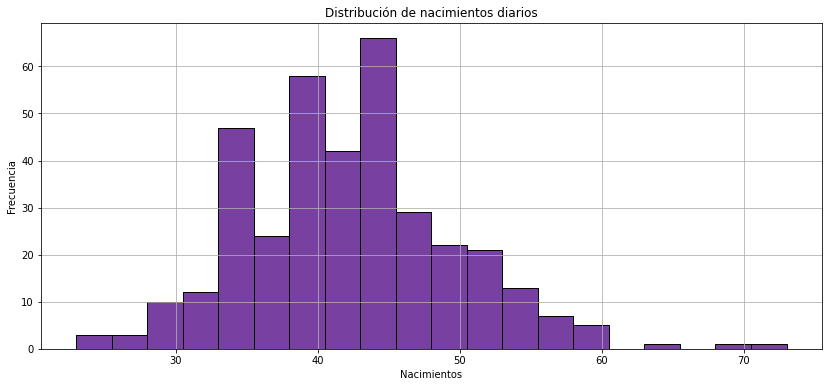

In [28]:
plt.figure(figsize=(14, 6))
sns.histplot(data["Births"], bins=20, color="indigo")
plt.title("Distribución de nacimientos diarios")
plt.xlabel("Nacimientos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


La distribución de los nacimientos diarios muestra una forma asimétrica ligeramente sesgada a la derecha. La mayoría de los días se registraron entre 35 y 50 nacimientos, con una concentración notable alrededor de los 40 a 45 nacimientos diarios, que parecen ser los valores más frecuentes. Se observan algunos valores extremos hacia la derecha del gráfico (por encima de 60 nacimientos), lo que indica la presencia de días inusuales con un número significativamente mayor de nacimientos. Aunque los nacimientos diarios suelen mantenerse dentro de un rango moderado, ocasionalmente pueden darse picos elevados. En general, la forma de la distribución no es perfectamente simétrica, pero tampoco presenta una dispersión excesiva.


**Serie de Tiempo**

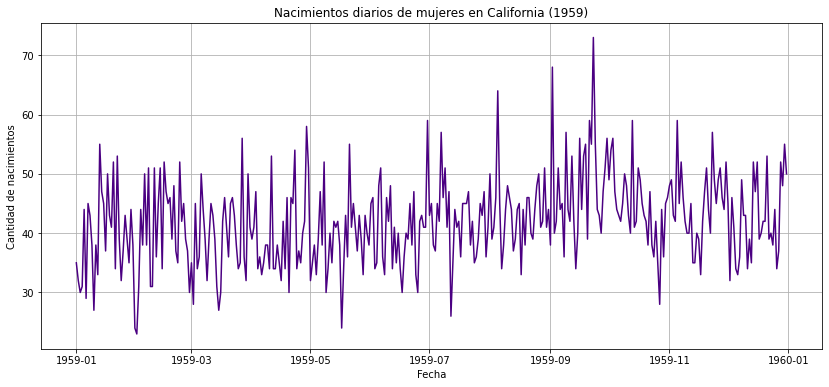

In [29]:

plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x=data.index, y="Births", color="indigo")
plt.title("Nacimientos diarios de mujeres en California (1959)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de nacimientos")
plt.grid(True)
plt.show()


La serie de tiempo representa la cantidad de nacimientos femeninos registrados cada día en California a lo largo del año 1959. A simple vista, se observa una alta variabilidad diaria, con valores que oscilan aproximadamente entre 30 y 70 nacimientos.

No se aprecia una tendencia clara ascendente o descendente a lo largo del año; sin embargo, sí pueden identificarse cambios en los niveles generales en ciertos tramos. Por ejemplo, hacia mediados y finales del año parecen concentrarse varios de los valores más altos. A pesar de ello, los picos elevados no se mantienen en el tiempo, lo que sugiere que estos son eventos aislados más que parte de una tendencia sostenida.

No se percibe una estacionalidad definida, aunque podrían existir patrones débiles o irregulares que no son fácilmente detectables visualmente sin un análisis más profundo.


**Descomposición aditiva**

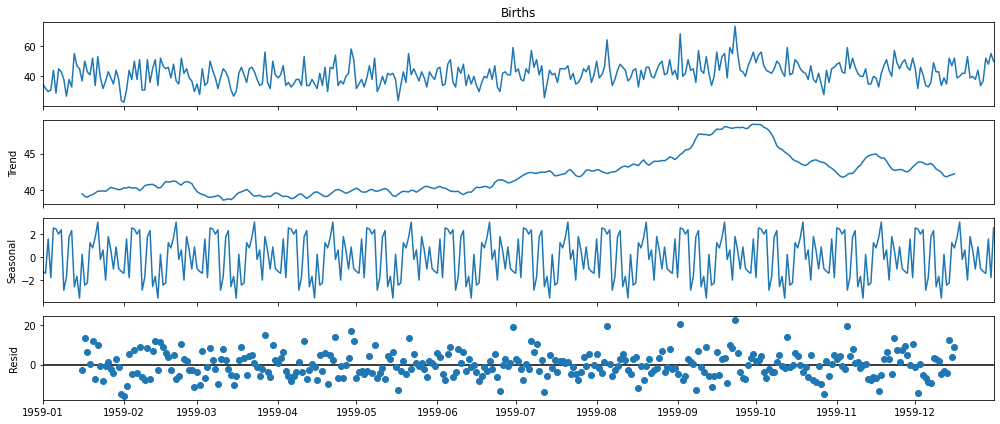

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(data["Births"], model="additive", period=30)

plt.rcParams["figure.figsize"] = (14, 6)

result.plot()
plt.tight_layout()
plt.show()


Al observar la componente de tendencia, se puede identificar un patrón de crecimiento progresivo a lo largo del año. A partir de mediados de julio, la tendencia comienza a incrementarse de manera más pronunciada, alcanzando su punto más alto alrededor de septiembre-octubre. Posteriormente, esta tendencia desciende levemente hacia el cierre del año, el cual muestra un comportamiento más marcado en el segundo semestre.

En cuanto a la estacionalidad, se evidencia un comportamiento cíclico que se repite aproximadamente cada 30 días. Este patrón periódico indica la existencia de ciertos días del mes en los que tienden a registrarse más nacimientos, y otros en los que los nacimientos tienden a disminuir.

Por último, los residuos representan las variaciones que no pueden explicarse ni por la tendencia general ni por el componente estacional. En este caso, la mayoría de los residuos se distribuyen alrededor de cero, lo cual es una buena señal de que el modelo ha capturado adecuadamente la estructura principal de la serie. Sin embargo, algunos valores atípicos sobresalen, lo cual podría indicar la existencia de ciertos días con comportamientos inesperados en el número de nacimientos.

**Generar conjuntos de entrenamiento y pruebas respecivamente**

In [31]:

train_size = int(len(data) * 0.7)
train = data["Births"].iloc[:train_size].copy()
test = data["Births"].iloc[train_size:].copy()


print(f"Training size: {len(train)}")
print(f"Test size: {len(test)}")

Training size: 255
Test size: 110


## Promedios Móviles

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

data["PM_30"] = data["Births"].rolling(window=30).mean()

valid_data = data.dropna(subset=["PM_30"])

# MAE
mae = mean_absolute_error(valid_data["Births"], valid_data["PM_30"])

# RMSE
rmse = np.sqrt(mean_squared_error(valid_data["Births"], valid_data["PM_30"]))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 5.36
RMSE: 6.81


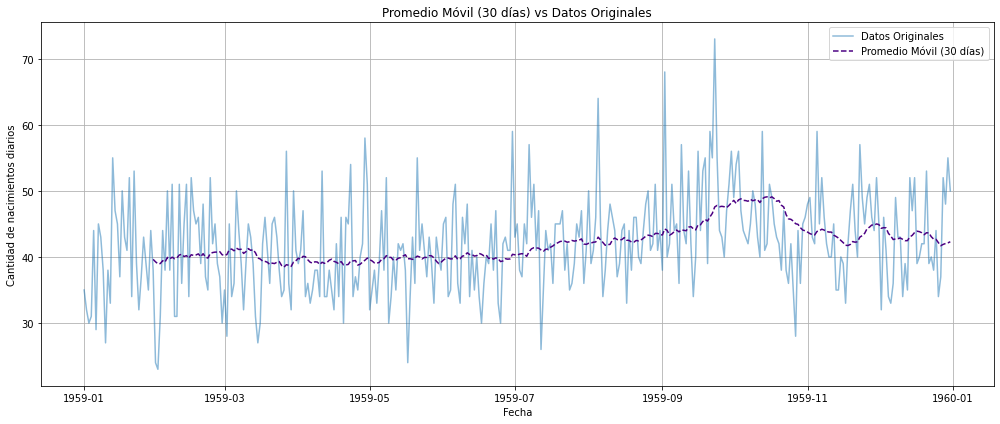

In [33]:

plt.figure(figsize=(14, 6))
plt.plot(data.index, data["Births"], label="Datos Originales", alpha=0.5)
plt.plot(data.index, data["PM_30"], label="Promedio Móvil (30 días)", linestyle="--", color="indigo")

plt.title("Promedio Móvil (30 días) vs Datos Originales")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de nacimientos diarios")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


El promedio móvil de 30 días fue aplicado a la serie original de nacimientos. Esta técnica tiene como objetivo reducir la variabilidad diaria y facilitar la observación de patrones generales a lo largo del tiempo. Al eliminar las variaciones más pequeñas, se obtiene una curva que representa de forma más clara la tendencia central del fenómeno.

Al comparar la serie original con su versión suavizada, se puede notar que los datos diarios presentan una alta variabilidad, con picos abruptos y caídas frecuentes. En cambio, la curva del promedio móvil se comporta de manera más estable y continua. Esto permite identificar con mayor claridad periodos de aumento o disminución sostenida en la cantidad de nacimientos.

En particular, la serie suavizada muestra un incremento moderado hacia el último trimestre del año, seguido de una ligera disminución en diciembre. Este tipo de análisis visual puede ser útil para detectar posibles patrones estacionales o contextuales, incluso si no se cuenta con información adicional sobre los factores externos que los explican.

## Alisamiento exponencial

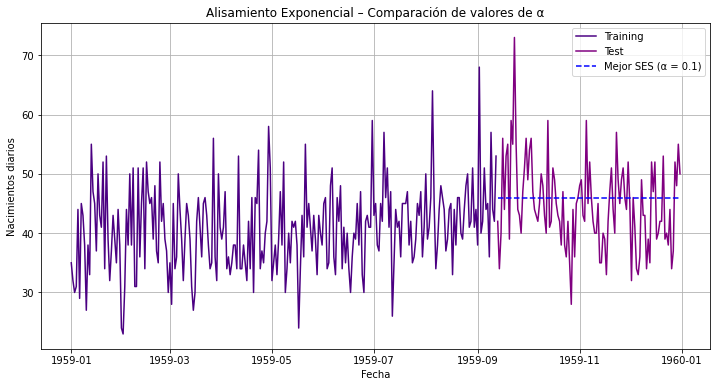

    modelo       RMSE       MAE
0  α = 0.1   7.294739  5.842391
1  α = 0.3   7.675082  6.273904
2  α = 0.5   8.192448  6.763310
3  α = 0.7   8.988598  7.501360
4  α = 0.9  10.201529  8.610630


In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import warnings
warnings.filterwarnings("ignore")

results_ses = []

# Probar diferentes valores de α
for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
    modelo = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
    pred = modelo.forecast(len(test))
    pred.index = test.index  

    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)

    results_ses.append({
        'modelo': f'α = {alpha}',
        'alpha': alpha,
        'RMSE': rmse,
        'MAE': mae,
        'predicciones': pred
    })

df_results = pd.DataFrame(results_ses).sort_values(by='RMSE')
mejor_modelo = df_results.iloc[0]

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training', color='indigo')
plt.plot(test.index, test, label='Test', color='purple')

# Mostrar la predicción del mejor α
plt.plot(test.index, mejor_modelo['predicciones'], label=f"Mejor SES ({mejor_modelo['modelo']})", linestyle='--', color='blue')

plt.title('Alisamiento Exponencial – Comparación de valores de α')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos diarios')
plt.legend()
plt.grid(True)
plt.show()

print(df_results[['modelo', 'RMSE', 'MAE']])


En esta gráfica se muestra el resultado del modelo de Alisamiento Exponencial Simple (SES) aplicado a la serie de nacimientos diarios de mujeres. Se probaron distintos valores del parámetro de suavizamiento α, y el mejor desempeño se obtuvo con α=0.1, el cual se refleja en la línea azul punteada. Este valor bajo de α indica que el modelo está dando mayor peso a los datos antiguos y responde lentamente a los cambios recientes en la serie.

Al observar la predicción generada por el modelo, se nota que es prácticamente una línea horizontal constante. Esto se debe a que el SES es un modelo muy simple que solo considera el nivel de la serie, sin tener en cuenta tendencias ni estacionalidad. Como resultado, su predicción no cambia mucho con el tiempo y actúa más como una especie de promedio suavizado.

Visualmente, puede apreciarse que el modelo no logra seguir las variaciones del conjunto de prueba. La serie de nacimientos muestra una alta variabilidad y ciertos patrones cíclicos o picos que el modelo SES no es capaz de capturar. Esto era de esperarse, ya que este tipo de modelo es útil cuando la serie es relativamente estable, pero en este caso parece haber cierta dinámica que requiere un enfoque más complejo.

## Holt-Winters

Solo nivel → RMSE: 7.26, MAE: 5.61
Nivel + Tendencia → RMSE: 7.39, MAE: 5.72
Nivel + Estacionalidad → RMSE: 7.26, MAE: 5.67
Nivel + Tendencia + Estacionalidad → RMSE: 7.40, MAE: 5.80


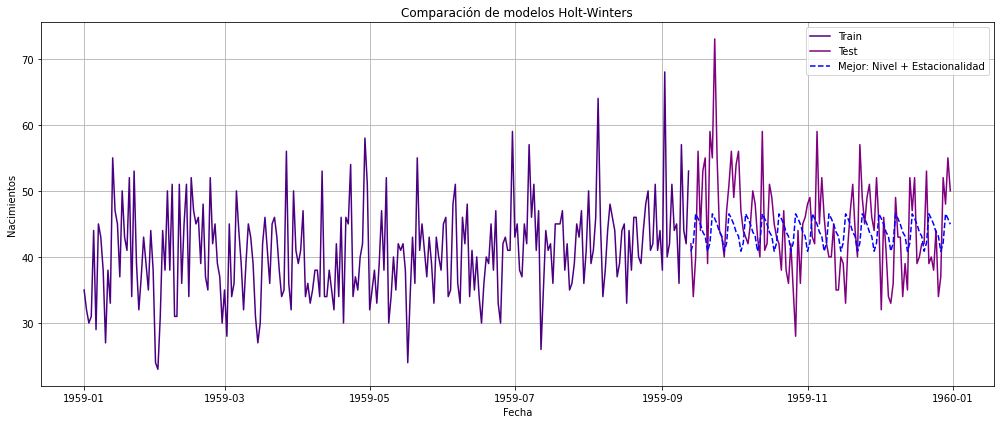

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

configuraciones = [
    {'trend': None, 'seasonal': None, 'label': 'Solo nivel'},
    {'trend': 'add', 'seasonal': None, 'label': 'Nivel + Tendencia'},
    {'trend': None, 'seasonal': 'add', 'seasonal_periods': 7, 'label': 'Nivel + Estacionalidad'},
    {'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 7, 'label': 'Nivel + Tendencia + Estacionalidad'}
]

results_hw = []

# Evaluar cada configuración
for config in configuraciones:
    try:
        modelo = ExponentialSmoothing(
            train,
            trend=config['trend'],
            seasonal=config['seasonal'],
            seasonal_periods=config.get('seasonal_periods')
        ).fit()
        
        pred = modelo.forecast(len(test))
        rmse = np.sqrt(mean_squared_error(test, pred))
        mae = mean_absolute_error(test, pred)
        
        results_hw.append({
            'Modelo': config['label'],
            'RMSE': rmse,
            'MAE': mae,
            'Predicción': pred
        })
        
        print(f"{config['label']} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")
        
    except Exception as e:
        print(f"Error en {config['label']}: {e}")

df_resultados = pd.DataFrame(results_hw).sort_values(by='RMSE')

# Mostrar mejor modelo
mejor_modelo = df_resultados.iloc[0]

plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train', color='indigo')
plt.plot(test.index, test, label='Test', color='purple')
plt.plot(test.index, mejor_modelo['Predicción'], label=f"Mejor: {mejor_modelo['Modelo']}", linestyle='--', color='blue')
plt.title('Comparación de modelos Holt-Winters')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Se probaron distintas configuraciones del modelo Holt-Winters: solo nivel, nivel con tendencia, con estacionalidad semanal y con ambos. Los resultados muestran que las configuraciones “Solo nivel” y “Nivel + Estacionalidad” obtuvieron los mejores RMSE (~7.26), aunque las diferencias entre modelos fueron pequeñas.

Se optó por destacar “Nivel + Estacionalidad” por su capacidad de capturar un patrón semanal leve sin aumentar el error. En la gráfica, este modelo genera pronósticos suaves y relativamente estables, aunque no logra reproducir del todo la alta variabilidad del conjunto de prueba. La inclusión de la tendencia no mejoró el desempeño, lo que indica que el comportamiento de la serie no sigue una dirección clara durante el periodo analizado.

## Sarima

SARIMA(0, 0, 0)x(0, 0, 0, 7) → RMSE: 45.29, MAE: 44.71
SARIMA(0, 0, 0)x(0, 0, 1, 7) → RMSE: 44.31, MAE: 43.41
SARIMA(0, 0, 0)x(0, 1, 0, 7) → RMSE: 9.51, MAE: 7.63
SARIMA(0, 0, 0)x(0, 1, 1, 7) → RMSE: 7.65, MAE: 6.17
SARIMA(0, 0, 0)x(1, 0, 0, 7) → RMSE: 10.18, MAE: 8.16
SARIMA(0, 0, 0)x(1, 0, 1, 7) → RMSE: 7.55, MAE: 6.03
SARIMA(0, 0, 0)x(1, 1, 0, 7) → RMSE: 9.99, MAE: 7.95
SARIMA(0, 0, 0)x(1, 1, 1, 7) → RMSE: 7.65, MAE: 6.16
SARIMA(0, 0, 1)x(0, 0, 0, 7) → RMSE: 45.15, MAE: 44.51
SARIMA(0, 0, 1)x(0, 0, 1, 7) → RMSE: 44.14, MAE: 43.21
SARIMA(0, 0, 1)x(0, 1, 0, 7) → RMSE: 9.51, MAE: 7.63
SARIMA(0, 0, 1)x(0, 1, 1, 7) → RMSE: 7.65, MAE: 6.16
SARIMA(0, 0, 1)x(1, 0, 0, 7) → RMSE: 10.24, MAE: 8.21
SARIMA(0, 0, 1)x(1, 0, 1, 7) → RMSE: 7.55, MAE: 6.03
SARIMA(0, 0, 1)x(1, 1, 0, 7) → RMSE: 9.99, MAE: 7.96
SARIMA(0, 0, 1)x(1, 1, 1, 7) → RMSE: 7.65, MAE: 6.15
SARIMA(0, 1, 0)x(0, 0, 0, 7) → RMSE: 10.98, MAE: 9.38
SARIMA(0, 1, 0)x(0, 0, 1, 7) → RMSE: 11.08, MAE: 9.49
SARIMA(0, 1, 0)x(0, 1, 0, 7) → RMS

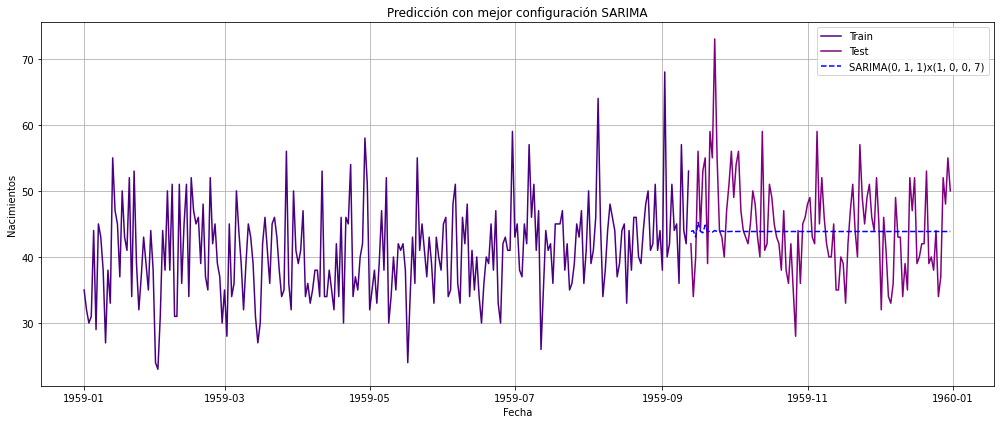

In [36]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Rango de parámetros a probar
p = d = q = range(0, 2)  
P = D = Q = range(0, 2)
s = 7

# Generar combinaciones
param_combinations = list(itertools.product(p, d, q))
seasonal_combinations = list(itertools.product(P, D, Q))

sarima_results = []

# Evaluar cada combinación
for order in param_combinations:
    for seasonal_order in seasonal_combinations:
        try:
            model = SARIMAX(
                train,
                order=order,
                seasonal_order=seasonal_order + (s,),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(disp=False)
            
            pred = model.forecast(len(test))
            rmse = np.sqrt(mean_squared_error(test, pred))
            mae = mean_absolute_error(test, pred)

            sarima_results.append({
                'order': order,
                'seasonal_order': seasonal_order,
                'RMSE': rmse,
                'MAE': mae,
                'Predicción': pred
            })
            
            print(f"SARIMA{order}x{seasonal_order + (s,)} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")
            
        except Exception as e:
            print(f"Error con SARIMA{order}x{seasonal_order + (s,)}: {e}")

# Elegir el mejor modelo
df_sarima = pd.DataFrame(sarima_results).sort_values(by='RMSE')
mejor = df_sarima.iloc[0]

# Graficar mejor predicción
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train', color='indigo')
plt.plot(test.index, test, label='Test', color='purple')
plt.plot(test.index, mejor['Predicción'], label=f"SARIMA{mejor['order']}x{mejor['seasonal_order'] + (s,)}", linestyle='--', color='blue')
plt.title('Predicción con mejor configuración SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

La mejor configuración encontrada para el modelo SARIMA fue (0, 1, 1)x(1, 0, 0, 7), lo cual indica que el modelo utiliza una diferenciación no estacional, un promedio móvil simple y un componente autorregresivo estacional semanal. En la gráfica, se observa que el modelo genera pronósticos bastante estables para el conjunto de prueba, con una línea azul punteada que se mantiene cercana al promedio reciente de los datos, pero que no logra capturar la gran variabilidad ni los picos abruptos de la serie. Aunque el modelo es efectivo para estabilizar el comportamiento general, no es el más adecuado cuando se requiere precisión en series con alta variación diaria como esta. Aun así, su desempeño es razonable y puede ser útil para escenarios donde se busca destacar una predicción conservadora sobre una altamente reactiva.

## Prophet

16:42:10 - cmdstanpy - INFO - Chain [1] start processing
16:42:10 - cmdstanpy - INFO - Chain [1] done processing
16:42:10 - cmdstanpy - INFO - Chain [1] start processing


Config {'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} → RMSE: 7.46, MAE: 5.88


16:42:10 - cmdstanpy - INFO - Chain [1] done processing
16:42:10 - cmdstanpy - INFO - Chain [1] start processing


Config {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive'} → RMSE: 8.83, MAE: 7.22


16:42:10 - cmdstanpy - INFO - Chain [1] done processing
16:42:11 - cmdstanpy - INFO - Chain [1] start processing


Config {'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} → RMSE: 7.47, MAE: 5.90


16:42:11 - cmdstanpy - INFO - Chain [1] done processing


Config {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative'} → RMSE: 8.83, MAE: 7.22


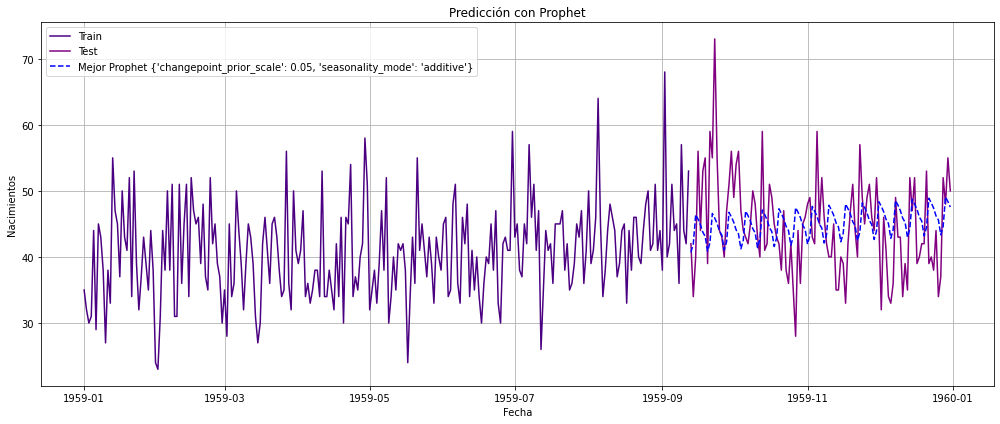

In [37]:
from prophet import Prophet

# Convertir a DataFrame con columnas 'ds' y 'y'
train_df = pd.DataFrame({'ds': train.index, 'y': train.values})
test_df = pd.DataFrame({'ds': test.index, 'y': test.values})

configs = [
    {"changepoint_prior_scale": 0.05, "seasonality_mode": "additive"},
    {"changepoint_prior_scale": 0.5, "seasonality_mode": "additive"},
    {"changepoint_prior_scale": 0.05, "seasonality_mode": "multiplicative"},
    {"changepoint_prior_scale": 0.5, "seasonality_mode": "multiplicative"},
]

results_prophet = []

for config in configs:
    model = Prophet(
        changepoint_prior_scale=config["changepoint_prior_scale"],
        seasonality_mode=config["seasonality_mode"]
    )
    
    model.fit(train_df)

    future = model.make_future_dataframe(periods=len(test_df), freq="D")
    forecast = model.predict(future)

    y_pred = forecast[['ds', 'yhat']].iloc[-len(test_df):]["yhat"].values
    y_true = test_df["y"].values

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    results_prophet.append({
        "config": config,
        "RMSE": rmse,
        "MAE": mae,
        "yhat": y_pred
    })

    print(f"Config {config} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Elegir mejor configuración
df_resultados = pd.DataFrame(results_prophet)
mejor = df_resultados.sort_values(by="RMSE").iloc[0]

plt.figure(figsize=(14, 6))
plt.plot(train_df['ds'], train_df['y'], label='Train', color='indigo')
plt.plot(test_df['ds'], test_df['y'], label='Test', color='purple')
plt.plot(test_df['ds'], mejor['yhat'], label=f"Mejor Prophet {mejor['config']}", linestyle='--', color='blue')
plt.title('Predicción con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


El modelo Prophet con la configuración changepoint_prior_scale: 0.05 y seasonality_mode: 'additive' logra capturar adecuadamente la tendencia general de la serie sin sobrerreaccionar a los picos más extremos. En la gráfica se observa que las predicciones (línea azul punteada) siguen un patrón suave y repetitivo que coincide con la estacionalidad observada en los datos, especialmente durante el período de prueba. Aunque el modelo no logra anticipar los valores atípicos más marcados, sí ofrece una representación coherente del comportamiento promedio de los nacimientos diarios. Esta configuración resulta útil para capturar variaciones moderadas con regularidad, lo cual es una de las fortalezas de Prophet, especialmente cuando se prioriza interpretabilidad y estabilidad en los pronósticos.

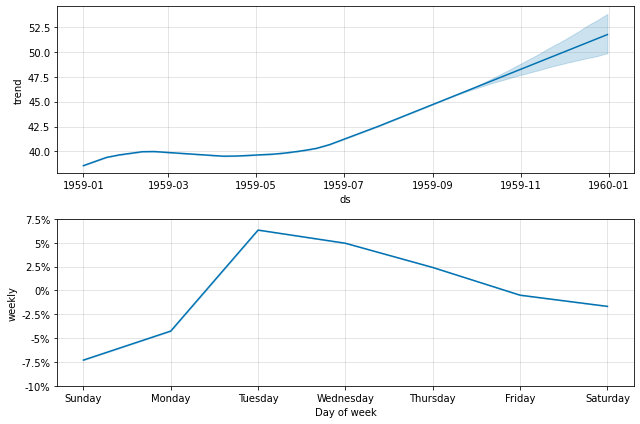

In [38]:
model.plot_components(forecast)
plt.tight_layout()
plt.show()



La primera gráfica representa la tendencia general en la serie temporal modelada por Prophet. Se observa que al inicio del periodo (principios de 1959), el valor de la variable (nacimientos diarios) se mantiene relativamente estable con ligeras oscilaciones. No obstante, a partir de mediados de año comienza una tendencia ascendente clara y sostenida, que se intensifica hacia finales de 1959. Esta tendencia indica que los nacimientos diarios aumentaron progresivamente con el tiempo, y el modelo prevé que esta alza continuará, como lo muestra la proyección con su intervalo de incertidumbre en azul claro. 

La segunda gráfica muestra la estacionalidad semanal, es decir, cómo varían sistemáticamente los nacimientos a lo largo de los días de la semana. El patrón revela que los domingos tienden a registrar la menor cantidad de nacimientos, con una desviación negativa cercana al -7.5%. A medida que avanza la semana, los valores aumentan, alcanzando su punto máximo los martes, que presentan un efecto positivo cercano al 6%. A partir de ahí, la frecuencia va disminuyendo paulatinamente hacia el sábado. Este comportamiento muestra como los nacimientos presentan un ritmo semanal predecible, lo cual puede estar relacionado con factores médicos, administrativos o sociales que influyen en cuándo ocurren o se registran los nacimientos.

## Comparación de modelos

         Modelo                                      Configuración      RMSE  \
0           SES                                            α = 0.1  7.294739   
1  Holt-Winters                             Nivel + Estacionalidad  7.258312   
2        SARIMA       order=(0, 1, 1), seasonal_order=(1, 0, 0, 7)  7.218791   
3       Prophet  {'changepoint_prior_scale': 0.05, 'seasonality...  7.462190   

        MAE  
0  5.842391  
1  5.671811  
2  5.582318  
3  5.880833  


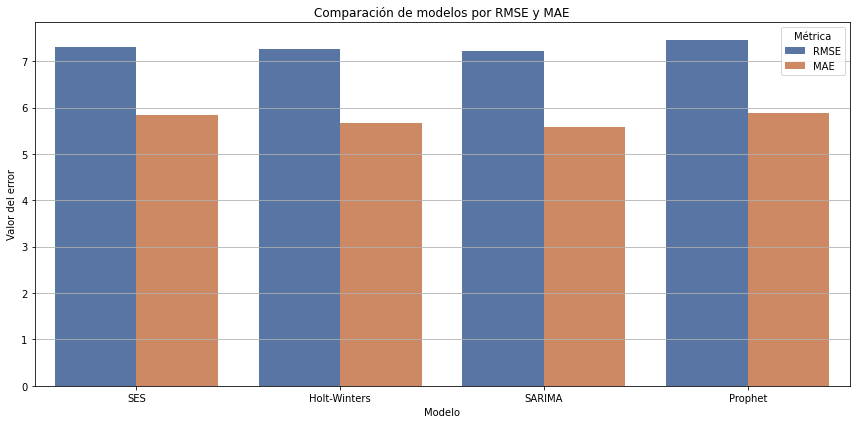

In [39]:
# Extraer el mejor modelo de cada técnica
mejor_ses = pd.DataFrame(results_ses).sort_values(by="RMSE").iloc[0]
mejor_hw = pd.DataFrame(results_hw).sort_values(by="RMSE").iloc[0]
mejor_sarima = pd.DataFrame(sarima_results).sort_values(by="RMSE").iloc[0]
mejor_prophet = pd.DataFrame(results_prophet).sort_values(by="RMSE").iloc[0]

# Resumen comparativo
resumen = pd.DataFrame([
    {
        "Modelo": "SES",
        "Configuración": mejor_ses["modelo"],
        "RMSE": mejor_ses["RMSE"],
        "MAE": mejor_ses["MAE"]
    },
    {
        "Modelo": "Holt-Winters",
        "Configuración": mejor_hw["Modelo"],
        "RMSE": mejor_hw["RMSE"],
        "MAE": mejor_hw["MAE"]
    },
    {
        "Modelo": "SARIMA",
        "Configuración": f"order={mejor_sarima['order']}, seasonal_order={mejor_sarima['seasonal_order'] + (7,)}",
        "RMSE": mejor_sarima["RMSE"],
        "MAE": mejor_sarima["MAE"]
    },
    {
        "Modelo": "Prophet",
        "Configuración": mejor_prophet["config"],
        "RMSE": mejor_prophet["RMSE"],
        "MAE": mejor_prophet["MAE"]
    }
])

print(resumen)

resumen_largo = resumen.melt(id_vars="Modelo", value_vars=["RMSE", "MAE"], var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resumen_largo, x="Modelo", y="Valor", hue="Métrica", palette="deep")
plt.title("Comparación de modelos por RMSE y MAE")
plt.ylabel("Valor del error")
plt.xlabel("Modelo")
plt.legend(title="Métrica")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Este gráfico de barras muestra la comparación entre cuatro modelos de predicción, SES (Suavizamiento Exponencial Simple), Holt-Winters, SARIMA y Prophet, utilizando dos métricas comunes de error: `RMSE` (Root Mean Squared Error) y `MAE` (Mean Absolute Error). Estas métricas permiten evaluar el desempeño de cada modelo al predecir los nacimientos diarios. En general, mientras más bajos sean estos valores, mejor será la precisión del modelo.

A simple vista, el modelo **SARIMA** presenta los valores más bajos tanto para el `RMSE` como para el `MAE`, lo que indica que fue el más efectivo al capturar la dinámica del conjunto de datos. Aunque las diferencias con Holt-Winters no son extremadamente grandes, **SARIMA** logra una ligera mejora, especialmente en la métrica `MAE`, que es menos sensible a grandes errores puntuales.

Por otro lado, el modelo Prophet muestra los errores más altos en ambas métricas. A pesarde su capacidad para modelar tendencias y estacionalidades complejas, no logró adaptarse tan bien a las características particulares de esta serie temporal. De forma similar, el modelo SES también tuvo un desempeño inferior, lo cual era previsible dado que este método simple no considera estacionalidades ni tendencias explícitas.

Con base en las métricas presentadas, el modelo **SARIMA** es el más adecuado para este dataset, ya que logra un mejor equilibrio entre precisión y capacidad de generalización en la predicción. 